In [1]:
# Import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set styles
sns.set(style='whitegrid')

In [2]:
# Read in the data from the first of two .txt files: df_1
df_1 = pd.read_csv('FFIEC CDR Call Subset of Schedules 2018(1 of 2).txt', sep='\t', engine='python')

# Drop the last column of the DataFrame
df_1.drop(df_1.columns[len(df_1.columns)-1], axis=1, inplace=True)

# Examine df_1
df_1.head()

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Name,Financial Institution Address,Financial Institution City,Financial Institution State,...,RCONB836,RCONB987,RCONB989,RCONB993,RCONB995,RCONC226,RCONC229,RCONC230,RCONC236,RCONC237
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,P/D(NONACCR):LOANS TO DI - DERIVED,FEDERAL FNDS SOLD,SECURS PURCHSD UDR AGRMNTS TO RESELL,FEDERAL FNDS PURCD IN DOMESTIC OFFCS,SECURS SOLD UNDR AGRMNTS TO REPURCH,LOANS & LEASES HLD FOR SALE-NONACCRL,CLSD-END LNS:SCRD 1ST LIENS-NONACCRL,CLSD-ED LNS:SCRD JR LIENS-NONACCRUAL,CLSD-ED LNS:SEC 1 LIENS PA DU 30-89,CLSD-ED LNS:SEC 1 LIENS PA DU 90 MOR
1,2018-12-31,37.0,10057.0,0.0,16553.0,61107146.0,BANK OF HANCOCK COUNTY,12855 BROAD STREET,SPARTA,GA,...,0,0,0,0,0,0,0,0,620,178
2,2018-12-31,242.0,3850.0,0.0,0.0,81220537.0,FIRST COMMUNITY BANK XENIA-FLORA,260 FRONT STREET,XENIA,IL,...,0,0,0,201,0,0,11,0,161,0
3,2018-12-31,279.0,28868.0,0.0,2523.0,311972526.0,"MINEOLA COMMUNITY BANK, SSB",215 W BROAD,MINEOLA,TX,...,0,6476,0,0,0,0,548,70,708,0
4,2018-12-31,354.0,14083.0,0.0,0.0,101107475.0,BISON STATE BANK,223 MAIN STREET,BISON,KS,...,0,1108,0,0,0,0,0,0,0,0


In [3]:
# Read in the data from  the second of two .txt files: df_2
df_2 = pd.read_csv('FFIEC CDR Call Subset of Schedules 2018(2 of 2).txt', sep='\t', engine='python')

# Drop the last column of the DataFrame
df_2.drop(df_2.columns[len(df_2.columns)-1], axis=1, inplace=True)

# Examine df_2
df_2.head()

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Name,Financial Institution Address,Financial Institution City,Financial Institution State,...,RIADH033,RIADH034,RIADH035,RIADHK03,RIADHK04,RIADHT69,RIADHT70,RIADHT73,RIADHT74,RIADJ321
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SEV CHAR DEP DOM OFF MAIN IND,SEV CHAR DEP DOM OFF ATM IND,SEV CHAR DEP DOM OFF ALL IND,"INTEREST EXPENSE, INTEREST ON DEPOSI","INTEREST EXPENSE, INTEREST ON DEPOSI",Income (loss) before unrealized hold,Unrealized holding gains (losses) on,Noninterest income: Fees and commiss,Noninterest income: Income from insu,OTTI LOSS RECOGNIZED EARNING
1,2018-12-31,37.0,10057.0,0.0,16553.0,61107146.0,BANK OF HANCOCK COUNTY,12855 BROAD STREET,SPARTA,GA,...,NaN,NaN,NaN,238,8,830,NaN,0,0,0
2,2018-12-31,242.0,3850.0,0.0,0.0,81220537.0,FIRST COMMUNITY BANK XENIA-FLORA,260 FRONT STREET,XENIA,IL,...,NaN,NaN,NaN,72,42,645,NaN,2,5,0
3,2018-12-31,279.0,28868.0,0.0,2523.0,311972526.0,"MINEOLA COMMUNITY BANK, SSB",215 W BROAD,MINEOLA,TX,...,NaN,NaN,NaN,999,100,971,NaN,60,0,0
4,2018-12-31,354.0,14083.0,0.0,0.0,101107475.0,BISON STATE BANK,223 MAIN STREET,BISON,KS,...,NaN,NaN,NaN,13,0,-38,NaN,0,0,0


In [4]:
# Create a list of column names for df_1: columns_list
columns_list = df_1.columns.tolist()

# Select only the first 14 column names from columns_list: columns_keep
columns_keep = columns_list[:13]

# Create a list of column names from the first row of df_1: first_row_list
first_row_list = df_1[:1].values.tolist()

# Remove the extraneous bracket from first_row_list
first_row_list = first_row_list[0]

# Remove first row column names that are 'nan'
first_row_keep = [x for x in first_row_list if str(x) != 'nan']

# Combine columns_keep with first_row_keep: new_column_names
new_column_names = columns_keep + first_row_keep

# Set df_1 column names equal to new_column_names
df_1.columns = new_column_names

# Drop the first row from df_1
df_1.drop(df_1.index[:1], inplace=True)

# Reset the index for df_1
df_1 = df_1.reset_index()

# Delete the new 'index' column from df_1
del df_1['index']

# Examine df_1
df_1.head()

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Name,Financial Institution Address,Financial Institution City,Financial Institution State,...,P/D(NONACCR):LOANS TO DI - DERIVED,FEDERAL FNDS SOLD,SECURS PURCHSD UDR AGRMNTS TO RESELL,FEDERAL FNDS PURCD IN DOMESTIC OFFCS,SECURS SOLD UNDR AGRMNTS TO REPURCH,LOANS & LEASES HLD FOR SALE-NONACCRL,CLSD-END LNS:SCRD 1ST LIENS-NONACCRL,CLSD-ED LNS:SCRD JR LIENS-NONACCRUAL,CLSD-ED LNS:SEC 1 LIENS PA DU 30-89,CLSD-ED LNS:SEC 1 LIENS PA DU 90 MOR
0,2018-12-31,37.0,10057.0,0.0,16553.0,61107146.0,BANK OF HANCOCK COUNTY,12855 BROAD STREET,SPARTA,GA,...,0,0,0,0,0,0,0,0,620,178
1,2018-12-31,242.0,3850.0,0.0,0.0,81220537.0,FIRST COMMUNITY BANK XENIA-FLORA,260 FRONT STREET,XENIA,IL,...,0,0,0,201,0,0,11,0,161,0
2,2018-12-31,279.0,28868.0,0.0,2523.0,311972526.0,"MINEOLA COMMUNITY BANK, SSB",215 W BROAD,MINEOLA,TX,...,0,6476,0,0,0,0,548,70,708,0
3,2018-12-31,354.0,14083.0,0.0,0.0,101107475.0,BISON STATE BANK,223 MAIN STREET,BISON,KS,...,0,1108,0,0,0,0,0,0,0,0
4,2018-12-31,457.0,10202.0,0.0,0.0,91208332.0,LOWRY STATE BANK,400 FLORENCE AVE.,LOWRY,MN,...,0,2785,0,0,0,0,214,13,0,0


In [5]:
# Determine the number of duplicate columns in df_1, if any
print('Number of duplicate columns in df_1: ', len(df_1.loc[:,df_1.columns.duplicated()].columns))

Number of duplicate columns in df_1:  68


In [6]:
# Create a list of column names for df_2: columns_list
columns_list = df_2.columns.tolist()

# Select only the first 14 column names from columns_list: columns_keep
columns_keep = columns_list[:13]

# Create a list of column names from the first row of df_2: first_row_list
first_row_list = df_2[:1].values.tolist()

# Remove the extraneous bracket from first_row_list
first_row_list = first_row_list[0]

# Remove first row column names that are 'nan'
first_row_keep = [x for x in first_row_list if str(x) != 'nan']

# Combine columns_keep with first_row_keep: new_column_names
new_column_names = columns_keep + first_row_keep

# Set df_2 column names equal to new_column_names
df_2.columns = new_column_names

# Drop the first row from df_2
df_2.drop(df_2.index[:1], inplace=True)

# Reset the index for df_2
df_2 = df_2.reset_index()

# Delete the new 'index' column from df_2
del df_2['index']

# Examine df_2
df_2.head()

,Reporting Period End Date,IDRSSD,FDIC Certificate Number,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Name,Financial Institution Address,Financial Institution City,Financial Institution State,...,SEV CHAR DEP DOM OFF MAIN IND,SEV CHAR DEP DOM OFF ATM IND,SEV CHAR DEP DOM OFF ALL IND,"INTEREST EXPENSE, INTEREST ON DEPOSI","INTEREST EXPENSE, INTEREST ON DEPOSI",Income (loss) before unrealized hold,Unrealized holding gains (losses) on,Noninterest income: Fees and commiss,Noninterest income: Income from insu,OTTI LOSS RECOGNIZED EARNING
0,2018-12-31,37.0,10057.0,0.0,16553.0,61107146.0,BANK OF HANCOCK COUNTY,12855 BROAD STREET,SPARTA,GA,...,NaN,NaN,NaN,238,8,830,NaN,0,0,0
1,2018-12-31,242.0,3850.0,0.0,0.0,81220537.0,FIRST COMMUNITY BANK XENIA-FLORA,260 FRONT STREET,XENIA,IL,...,NaN,NaN,NaN,72,42,645,NaN,2,5,0
2,2018-12-31,279.0,28868.0,0.0,2523.0,311972526.0,"MINEOLA COMMUNITY BANK, SSB",215 W BROAD,MINEOLA,TX,...,NaN,NaN,NaN,999,100,971,NaN,60,0,0
3,2018-12-31,354.0,14083.0,0.0,0.0,101107475.0,BISON STATE BANK,223 MAIN STREET,BISON,KS,...,NaN,NaN,NaN,13,0,-38,NaN,0,0,0
4,2018-12-31,457.0,10202.0,0.0,0.0,91208332.0,LOWRY STATE BANK,400 FLORENCE AVE.,LOWRY,MN,...,NaN,NaN,NaN,85,23,1260,NaN,0,0,0


In [7]:
# Determine the number of duplicate columns in df_2, if any
print('Number of duplicate columns in df_2: ', len(df_2.loc[:,df_2.columns.duplicated()].columns))

Number of duplicate columns in df_2:  4


In [8]:
# Determine unique columns to join the DataFrames on: cols_to_use
cols_to_use = df_2.columns.difference(df_1.columns)

# Create a new DataFrame that combines unique columns from df_1 and df_2: df
df = pd.merge(left=df_1, right=df_2[cols_to_use], left_index=True, right_index=True, how='outer')

# Filter on only the most recent 'Reporting Period End Date'
df = df[df['Reporting Period End Date'] == max(df['Reporting Period End Date'])]

# Set 'AUDIT INDICATOR' and 'DOES THE RPRTNG BK HAV A SUBCHPTR S?' to dummy variables
df = pd.get_dummies(df, columns=['AUDIT INDICATOR', 'DOES THE RPRTNG BK HAV A SUBCHPTR S?'])

# Determine those columns that df and df_2 have in common and replace null values with the values in df_2 if they exist
nan_cols = df_2.columns.intersection(df.columns)
for column in df_2[nan_cols]:
    df[column].fillna(df_2[column])

# Replace any remaning null values with 0
df = df.fillna(0)

# Exclude the ID columns from df: data
data = df.iloc[:,13:]

# Convert data to numeric values
data = data.apply(pd.to_numeric)

# Group and sum duplicate columns in data
data = data.groupby(data.columns, axis=1).sum()

# Examine data
data.head()

,1-4 FAM RES CNSTRCTN LN NONACCRUAL,1-4 FAM RES CNSTRCTN LN PD 31-89 DA,1-4 FAM RES CNSTRCTN LN PD > 90 DAY,ACCUMULATED OTH COMPREHENSIVE INCOME,ACQUISITION DATE,ADDITIONS TO NONACCRUAL ASSETS,ALL OTHER LOANS-NONACCRUAL,ALL OTHER LOANS-PAST DU 30-89 DAYS,ALL OTHER LOANS-PAST DU 90 DYS OR MO,ALL OTHR LEASE NONACCRUAL,...,TRDG REVENUE CR EXP,TRDG REVNU FROM COMMODITY&OTHER,TRDG REVNU FROM EQTY SEC EXPOSURES,TRDG REVNU FROM FGN EXCH EXPOSURES,TRDG REVNU FROM INT RATE EXPOSURES,UNDIVIDED PROFITS & CAPITAL RESERVES,UNPD BAL LN HLD FOR SALE NONACCRUAL,UNPD BAL LN HLD FOR SALE PD 30 - 89,UNPD BAL LN HLD FOR SALE PD 90,Unrealized holding gains (losses) on
0,0,0,0,-598,0,0,0,0,0,0,...,0,0,0,0,0,10711,0,0,0,0
1,0,0,0,-124,0,0,0,0,0,0,...,0,0,0,0,0,4763,0,0,0,0
2,0,405,0,-241,0,0,0,0,0,0,...,0,0,0,0,0,29913,0,0,0,0
3,0,0,0,-7,0,0,0,0,0,0,...,0,0,0,0,0,309,0,0,0,0
4,0,0,0,0,0,0,0,38,0,0,...,0,0,0,0,0,1406,0,0,0,0


/Users/ryneschultz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


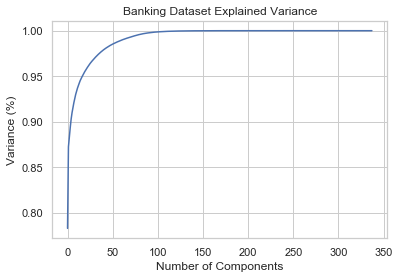

In [9]:
# rescale our data to a range between 0 and 1, with MinMaxScaler from sklearn: df_rescaled
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)

# fit PCA to df_rescaled: pca
pca = PCA().fit(data_rescaled)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Banking Dataset Explained Variance')
plt.show()

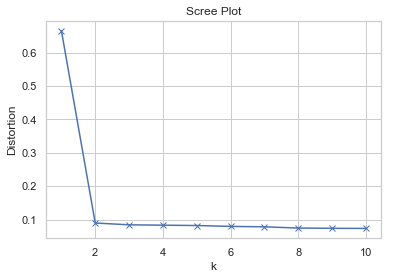

In [10]:
# fit the PCA algorithm with the new optimal number of components: dataset
dataset = PCA(n_components=50).fit_transform(data_rescaled)

# Determine k using a Scree Plot
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Scree Plot')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(dataset)

Cluster = kmeans.predict(dataset)

# Bring in 'IDRSSD' and 'Financial Institution Name'
IDRSSD = df['IDRSSD']
Financial_Institution_Name = df['Financial Institution Name']

# Zip together  using a list comprehension: zipped
zipped = [list(t) for t in zip(IDRSSD, Financial_Institution_Name, Cluster)]

# Convert the zipped list into a DataFrame: df_clustered
df_clustered = pd.DataFrame(zipped, columns=['IDRSSD', 'Financial Institution Name', 'Cluster'])

# Print the resulting cluster DataFrames
cluster_0 = df_clustered[df_clustered['Cluster'] == 0]
print(cluster_0.head())
print('Cluster Size: ', len(cluster_0))
print('\n')

cluster_1 = df_clustered[df_clustered['Cluster'] == 1]
print(cluster_1.head())
print('Cluster Size: ', len(cluster_1))
print('\n')

cluster_2 = df_clustered[df_clustered['Cluster'] == 2]
print(cluster_2.head())
print('Cluster Size: ', len(cluster_2))
print('\n')

cluster_3 = df_clustered[df_clustered['Cluster'] == 3]
print(cluster_3.head())
print('Cluster Size: ', len(cluster_3))
print('\n')

   IDRSSD           Financial Institution Name  Cluster
0    37.0               BANK OF HANCOCK COUNTY        0
2   279.0          MINEOLA COMMUNITY BANK, SSB        0
3   354.0                     BISON STATE BANK        0
5   505.0           BALLSTON SPA NATIONAL BANK        0
9  1669.0  LIBERTY NATIONAL BANK IN PARIS, THE        0
Cluster Size:  3606


   IDRSSD        Financial Institution Name  Cluster
1   242.0  FIRST COMMUNITY BANK XENIA-FLORA        1
4   457.0                  LOWRY STATE BANK        1
6  1155.0  FIRST STATE BANK & TRUST COMPANY        1
7  1351.0                   BANK OF GRANDIN        1
8  1454.0             HILLTOP NATIONAL BANK        1
Cluster Size:  1846


        IDRSSD                 Financial Institution Name  Cluster
1907  451965.0     WELLS FARGO BANK, NATIONAL ASSOCIATION        2
2046  480228.0      BANK OF AMERICA, NATIONAL ASSOCIATION        2
3669  852218.0  JPMORGAN CHASE BANK, NATIONAL ASSOCIATION        2
Cluster Size:  3


        IDRSSD 

In [12]:
# Merge df ID columns with data
df_ids = df.iloc[:,:13]
df = pd.merge(right=data, left=df_ids, left_index=True, right_index=True, how='outer')

# Create new column in df that contains the clusters
df['Cluster'] = df_clustered['Cluster']

# Seperate df into it's cluster groups: df_cluster_0, df_cluster_1, and df_cluster_2
df_cluster_0 = df[df['Cluster'] == 0]

df_cluster_1 = df[df['Cluster'] == 1]

df_cluster_2 = df[df['Cluster'] == 2]

df_cluster_3 = df[df['Cluster'] == 3]

### df_cluster_0 - TOTAL ASSETS ###
count    3.606000e+03
mean     2.858822e+06
std      1.857419e+07
min      2.500000e+03
25%      1.146972e+05
50%      2.782165e+05
75%      7.365850e+05
max      4.594766e+08
Name: TOTAL ASSETS, dtype: float64


### df_cluster_1 - TOTAL ASSETS ###
count    1.846000e+03
mean     2.969512e+05
std      6.175538e+05
min      4.454000e+03
25%      8.644200e+04
50%      1.604485e+05
75%      2.995615e+05
max      1.723078e+07
Name: TOTAL ASSETS, dtype: float64


### df_cluster_2 - TOTAL ASSETS ###
count    3.000000e+00
mean     1.896983e+09
std      2.827143e+08
min      1.689351e+09
25%      1.735995e+09
50%      1.782639e+09
75%      2.000800e+09
max      2.218960e+09
Name: TOTAL ASSETS, dtype: float64


### df_cluster_3 - TOTAL ASSETS ###
count    1.000000e+00
mean     1.406745e+09
std               NaN
min      1.406745e+09
25%      1.406745e+09
50%      1.406745e+09
75%      1.406745e+09
max      1.406745e+09
Name: TOTAL ASSETS, dtype: float64




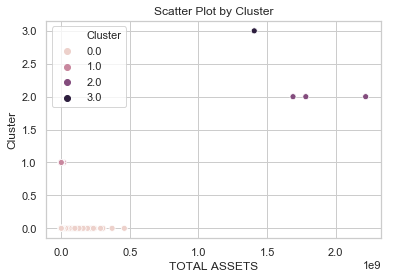

In [13]:
# 'TOTAL ASSETS'
print('### df_cluster_0 - TOTAL ASSETS ###')
print(df_cluster_0['TOTAL ASSETS'].astype('float64', errors='ignore').describe())
print('\n')

print('### df_cluster_1 - TOTAL ASSETS ###')
print(df_cluster_1['TOTAL ASSETS'].astype('float64', errors='ignore').describe())
print('\n')

print('### df_cluster_2 - TOTAL ASSETS ###')
print(df_cluster_2['TOTAL ASSETS'].astype('float64', errors='ignore').describe())
print('\n')

print('### df_cluster_3 - TOTAL ASSETS ###')
print(df_cluster_3['TOTAL ASSETS'].astype('float64', errors='ignore').describe())
print('\n')

sns.scatterplot(x=df['TOTAL ASSETS'].astype('float64', errors='ignore'), y=df['Cluster'].astype('float64', errors='ignore'), hue=df['Cluster'].astype('float64', errors='ignore'))
plt.xlabel('TOTAL ASSETS')
plt.title('Scatter Plot by Cluster')
plt.show()

### df_cluster_0 - TOTAL DEPOSITS ###
count    3.606000e+03
mean     2.226073e+06
std      1.450085e+07
min      0.000000e+00
25%      9.349375e+04
50%      2.281455e+05
75%      6.076240e+05
max      3.562971e+08
Name: TOTAL DEPOSITS, dtype: float64


### df_cluster_1 - TOTAL DEPOSITS ###
count    1.846000e+03
mean     2.475865e+05
std      4.458073e+05
min      0.000000e+00
25%      7.270750e+04
50%      1.349345e+05
75%      2.556512e+05
max      8.843603e+06
Name: TOTAL DEPOSITS, dtype: float64


### df_cluster_2 - TOTAL DEPOSITS ###
count    3.000000e+00
mean     1.452281e+09
std      1.081003e+08
min      1.341971e+09
25%      1.399408e+09
50%      1.456846e+09
75%      1.507436e+09
max      1.558027e+09
Name: TOTAL DEPOSITS, dtype: float64


### df_cluster_3 - TOTAL DEPOSITS ###
count    1.000000e+00
mean     1.025133e+09
std               NaN
min      1.025133e+09
25%      1.025133e+09
50%      1.025133e+09
75%      1.025133e+09
max      1.025133e+09
Name: TOTAL DEPOSITS, dtype

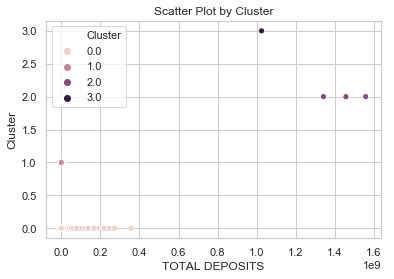

In [14]:
# 'TOTAL DEPOSITS'
print('### df_cluster_0 - TOTAL DEPOSITS ###')
print(df_cluster_0['TOTAL DEPOSITS'].astype('float64', errors='ignore').describe())
print('\n')

print('### df_cluster_1 - TOTAL DEPOSITS ###')
print(df_cluster_1['TOTAL DEPOSITS'].astype('float64', errors='ignore').describe())
print('\n')

print('### df_cluster_2 - TOTAL DEPOSITS ###')
print(df_cluster_2['TOTAL DEPOSITS'].astype('float64', errors='ignore').describe())
print('\n')

print('### df_cluster_3 - TOTAL DEPOSITS ###')
print(df_cluster_3['TOTAL DEPOSITS'].astype('float64', errors='ignore').describe())
print('\n')

sns.scatterplot(x=df['TOTAL DEPOSITS'].astype('float64', errors='ignore'), y=df['Cluster'].astype('float64', errors='ignore'), hue=df['Cluster'].astype('float64', errors='ignore'))
plt.xlabel('TOTAL DEPOSITS')
plt.title('Scatter Plot by Cluster')
plt.show()